<a href="https://colab.research.google.com/github/friedelj/AAI-510-TEAM-03/blob/main/JFriedel_CV_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3 Exercise: Object Detection and Segmentation
Part 1- Object Segmentation
Object detection is a task in computer vision that involves identifying the presence, location, and type of one or more objects in a given image. In order to have an accurate object detection model, we need to train a model based of thousands or millions of images related to that object and this makes the task even more challenging. As was mentioned in week 2, even after finding appropriate data, training the model is not an easy task. We discussed one solution which was using pre-trained models. COCO is a large-scale object detection, segmentation, and captioning dataset.
a) Load the image dataset oxford_iiit from tf
b) Create the segmentation mask on the first 3 samples in the dataset. Show both the image and the segmented version of it. Remember to map the images into 128x128.[link text](https://)

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import numpy as np
import cv2

In [ ]:
# #a) Load the oxford_iiit_pet dataset
# Load the Oxford-IIIT Pet dataset
dataset, info = tfds.load('oxford_iiit_pet', split='train', with_info=True)

# Function to preprocess the image and segmentation mask
def preprocess_sample(sample):
    # Resize images and masks to 128x128
    image = tf.image.resize(sample['image'], [128, 128])
    mask = tf.image.resize(sample['segmentation_mask'], [128, 128])

    # Normalize the image to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    return image, mask

# Preprocess the dataset
dataset = dataset.map(preprocess_sample)

# Display function to show images and segmentation masks
def display_images_and_masks(dataset, num_samples=3):
    plt.figure(figsize=(10, num_samples * 5))
    for i, (image, mask) in enumerate(dataset.take(num_samples)):
        # Show the image
        plt.subplot(num_samples, 2, 2*i + 1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [3]:
# Resize, Normalize, Adjust Mask
def read_and_preprocess(data):
    # Resize the image and segmentation mask to 128x128
    input_image = tf.image.resize(data['image'], [128, 128])
    input_mask = tf.image.resize(data['segmentation_mask'], [128, 128])

    # Normalize the image to [0, 1]
    input_image = tf.image.convert_image_dtype(input_image, tf.float32)

    # Adjust the mask values from {1,2,3} to {0,1,2}
    input_mask = tf.cast(input_mask, tf.int32) - 1

    return input_image, input_mask

In [4]:
# Load the Oxford-IIIT Pet dataset
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)

# Map the read_and_preprocess function onto train and test datasets
train = dataset['train'].map(read_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test = dataset['test'].map(read_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)

# Optional: Batch, shuffle, and prefetch the train and test datasets for efficiency
train = train.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test = test.batch(32).prefetch(tf.data.AUTOTUNE)

# Display information
print(f"Number of samples in the train set: {info.splits['train'].num_examples}")
print(f"Number of samples in the test set: {info.splits['test'].num_examples}")

NotImplementedError: `.as_dataset()` not implemented for ArrayRecord files. Please, use `.as_data_source()`.

In [5]:
# # b) Create the segmentation mask
# Show some images from dataset and their segmented version
# Function to display images and their segmentation masks
def display_images_and_masks(dataset, num_samples=3):
    plt.figure(figsize=(10, num_samples * 5))
    for i, (image, mask) in enumerate(dataset.take(num_samples)):
        # Display the original image
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis("off")

        # Display the segmentation mask
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(mask[:, :, 0], cmap='gray')  # Show the mask in grayscale
        plt.title("Segmentation Mask")
        plt.axis("off")
    plt.show()

# Show images and masks from the train dataset
display_images_and_masks(train)

NameError: name 'train' is not defined

# Install mrcnn

Install dependencies (TensorFlow, Keras, and other packages)

In [6]:
!pip install numpy scipy h5py pillow tensorflow keras opencv-python-headless

Install mrcnn from GitHub

In [7]:
!pip install git+https://github.com/matterport/Mask_RCNN.git

  Cloning https://github.com/matterport/Mask_RCNN.git to /tmp/pip-req-build-fkxt0jhg
  Running command git clone --filter=blob:none --quiet https://github.com/matterport/Mask_RCNN.git /tmp/pip-req-build-fkxt0jhg
  Resolved https://github.com/matterport/Mask_RCNN.git to commit 3deaec5d902d16e1daf56b62d5971d428dc920bc
  Preparing metadata (setup.py) ... done
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-py3-none-any.whl size=56920 sha256=b5ba8a0357ee58eeded6929fe53444db2f07b29c5b1c5e5a88dc57500758f866
  Stored in directory: /tmp/pip-ephem-wheel-cache-qhe306eg/wheels/63/8e/bf/ef4901e305146aa3a21fbbaac877c3a204180eca9a71c8e291
Successfully built mask-rcnn


Verify Installation

In [8]:
import mrcnn
print("mrcnn installed successfully")

mrcnn installed successfully


# Get data from here https://github.com/experiencor/raccoon_dataset

In [9]:
import requests
import zipfile
import io
import os

# URL of the raccoon dataset ZIP file on GitHub
url = "https://github.com/experiencor/raccoon_dataset/archive/refs/heads/master.zip"

# Download the dataset
response = requests.get(url)
if response.status_code == 200:
    # Extract the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall("raccoon_dataset")
    print("Raccoon dataset downloaded and extracted successfully.")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")

# Check if the dataset directory exists
if os.path.exists("raccoon_dataset/raccoon_dataset-master"):
    print("Dataset is ready for use.")
else:
    print("Dataset download or extraction failed.")

Raccoon dataset downloaded and extracted successfully.
Dataset is ready for use.


# Look into data
# Plot some samples here

Inspect the Dataset Structure

In [10]:
import os

# Define the path to the extracted raccoon dataset
dataset_path = "raccoon_dataset/raccoon_dataset-master"
images_path = os.path.join(dataset_path, "images")
annotations_path = os.path.join(dataset_path, "annotations")

# List image and annotation files
image_files = sorted(os.listdir(images_path))
annotation_files = sorted(os.listdir(annotations_path))

print(f"Number of images: {len(image_files)}")
print(f"Number of annotations: {len(annotation_files)}")
print("Sample image files:", image_files[:5])
print("Sample annotation files:", annotation_files[:5])

Number of images: 200
Number of annotations: 200
Sample image files: ['raccoon-1.jpg', 'raccoon-10.jpg', 'raccoon-100.jpg', 'raccoon-101.jpg', 'raccoon-102.jpg']
Sample annotation files: ['raccoon-1.xml', 'raccoon-10.xml', 'raccoon-100.xml', 'raccoon-101.xml', 'raccoon-102.xml']


Plot 9 Sample Images

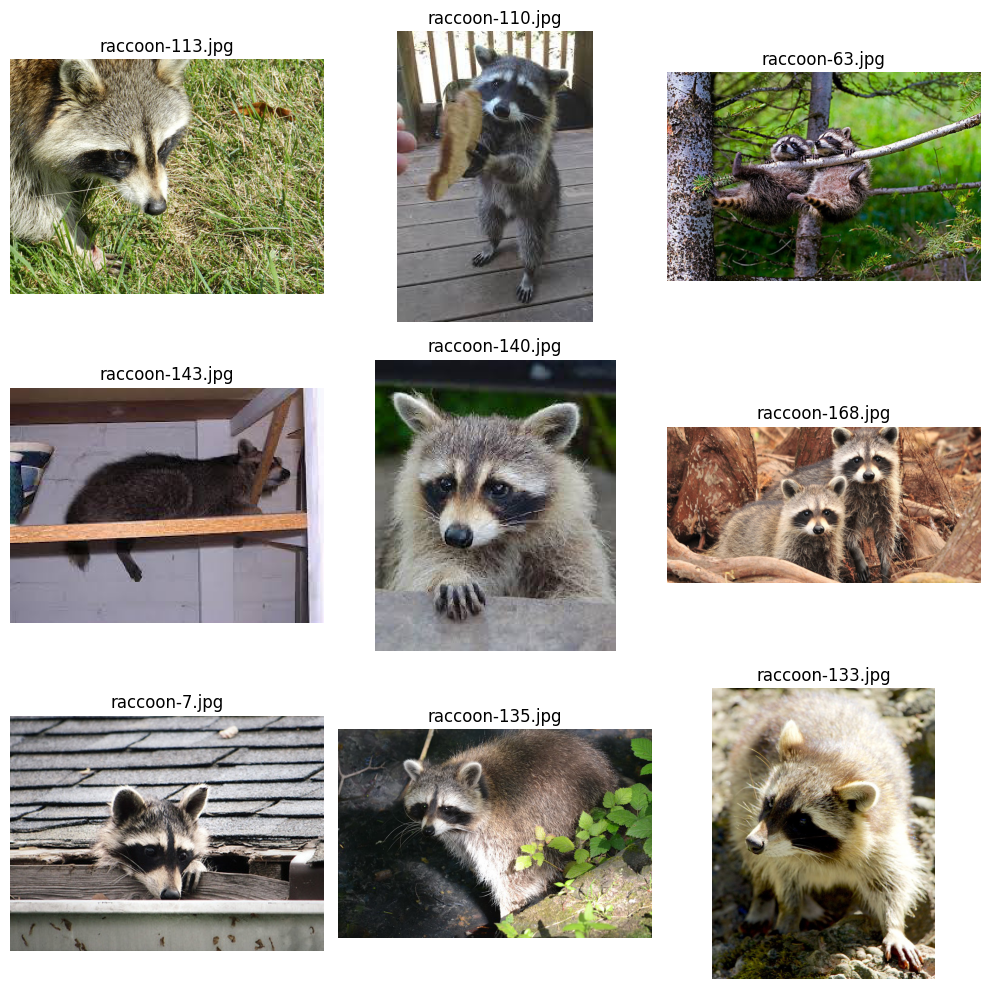

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Select 9 random images to display
sample_images = random.sample(image_files, 9)

# Plot the images in a 3x3 grid
plt.figure(figsize=(10, 10))
for i, image_file in enumerate(sample_images):
    img = mpimg.imread(os.path.join(images_path, image_file))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset

In [13]:
# class that defines and loads the raccoon dataset
class RaccoonDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
		# define one class
		self.add_class("raccoon_dataset", 1, "raccoon")
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annotations/raccoon-'
		# find all images
		for filename in listdir(images_dir):
			# extract image id
			image_id = filename[8:-4]
			# skip bad images
			if image_id in ['00090']:
				continue
			# skip all images after 150 if we are building the train set
			if is_train and int(image_id) >= 150:
				continue
			# skip all images before 150 if we are building the test/val set
			if not is_train and int(image_id) < 150:
				continue
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)


In [14]:
	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height

In [18]:
	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		path = '/content/raccoon_dataset/annotations/raccoon_dataset/raccoon_dataset-master'  #Added by me
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_ids.append(self.class_names.index('raccoon'))
		return masks, asarray(class_ids, dtype='int32')

In [19]:
	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']

In [20]:
# train set
train_set = RaccoonDataset()
train_set.load_dataset('raccoon_dataset', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

FileNotFoundError: [Errno 2] No such file or directory: 'raccoon_dataset/images/'

In [21]:
# test/val set
test_set = RaccoonDataset()
test_set.load_dataset('raccoon_dataset', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

FileNotFoundError: [Errno 2] No such file or directory: 'raccoon_dataset/images/'

# load an image
# Use the function above to create the image and its mask

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random

# Function to display an image and its mask
def display_image_with_mask(dataset, image_id):
    # Load the image and mask
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title("Image with Mask")

    # Overlay each mask on the image
    for i in range(mask.shape[-1]):  # Iterate through each mask
        masked_region = mask[:, :, i]
        plt.imshow(masked_region, cmap='Reds', alpha=0.3)  # Overlay mask with transparency

        # Get bounding box coordinates
        y_indices, x_indices = masked_region.nonzero()
        if y_indices.size > 0 and x_indices.size > 0:
            ymin, ymax = y_indices.min(), y_indices.max()
            xmin, xmax = x_indices.min(), x_indices.max()

            # Draw a rectangle around the bounding box
            rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             linewidth=2, edgecolor='blue', facecolor='none')
            plt.gca().add_patch(rect)

    plt.axis('off')
    plt.show()

# Display a few random images with masks from the train dataset
for _ in range(3):  # Display 3 samples
    image_id = random.choice(train_set.image_ids)
    display_image_with_mask(train_set, image_id)

IndexError: list index out of range

Part 3 YOLO
In 2016, researchers at Washington University, Allen Institute for AI, and Facebook AI Research proposed “You Only Look Once” (YOLO), a family of neural networks that improved the speed and accuracy of object detection with deep learning.
The main improvement in YOLO is the integration of the entire object detection and classification process in a single network. Instead of extracting features and regions separately, YOLO performs everything in a single pass through a single network, hence the name “You Only Look Once.”
YOLOv10, developed by researchers at Tsinghua University using the Ultralytics Python package, offers a novel approach to real-time object detection. It addresses post-processing and model architecture shortcomings found in previous YOLO versions. By removing non-maximum suppression (NMS) and optimizing various model components, YOLOv10 achieves state-of-the-art performance with significantly reduced computational overhead. Extensive experiments highlight its superior accuracy-latency trade-offs across multiple model scales. You can read more about it here.
a)  For the first part of the assignment, we want to see how to create the annotation for a custom dataset. You can use the provided html file (annotation_tool.html). When you open the file, upload an image of your desire and assign the proper class. Here you see an image of a raccoon and its chosen
class.

In [1]:
import os
HOME = os.getcwd()
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt

c. Now, we want to test the model out of box. There is an image stored in: “/content/yolov10/ultralytics/assets/bus.jpg”. Apply YOLO10 command to make predictions.
After making the prediction, the result will be stored in “/content/runs/detect/predict/bus.jpg”. Call the image and show the result of prediction.

In [23]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load the YOLOv10 model
model = YOLO("yolov10.pt")  # Replace "yolov10.pt" with the correct path if different

# Path to the input image
image_path = "/content/yolov10/ultralytics/assets/bus.jpg"

# Run the model on the image to make predictions
results = model(image_path)

# Save the results to the specified output path
output_path = "/content/runs/detect/predict/bus.jpg"
results.save("/content/runs/detect/predict/")  # This will save the result in the output directory

# Load and display the saved result image with predictions
predicted_image = cv2.imread(output_path)
predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(predicted_image)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'ultralytics'

d) Now, is the time to try to fine-tune the model. Train the Yolo10n model on coco128.ml. For this part use 10 epochs and 32 batches. Show the confusion matrix which is stored in: {HOME}/runs/detect/train/confusion_matrix.png Next, show the learning curves which are stored in: {HOME}/runs/detect/train/results.png e) Explain what you see in the learning curves and confusion matrix.

In [24]:
# Fine-tune the YOLOv10n model
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2

# Load the YOLOv10n model
model = YOLO("yolov10n.pt")  # Use "yolov10n.pt" for the nano version of YOLOv10

# Train the model on the coco128 dataset for 10 epochs with batch size 32
results = model.train(
    data="coco128.yaml",   # Path to the coco128 dataset YAML file
    epochs=10,
    batch=32

SyntaxError: incomplete input (<ipython-input-24-8ae04266dcdb>, line 14)

Display the Confusion Matrix and Learning Curves

In [25]:
# Define the paths to the saved images
home_dir = os.getenv("HOME")
confusion_matrix_path = f"{home_dir}/runs/detect/train/confusion_matrix.png"
results_path = f"{home_dir}/runs/detect/train/results.png"

# Load and display the confusion matrix
confusion_matrix_img = cv2.imread(confusion_matrix_path)
confusion_matrix_img = cv2.cvtColor(confusion_matrix_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

# Load and display the learning curves
results_img = cv2.imread(results_path)
results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(results_img)
plt.axis("off")
plt.title("Learning Curves")
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


e) Explain what you see in the learning curves and confusion matrix.

The confusion matrix provides an overview of the model's performance on classification tasks. YOLO models, being multi-class object detectors, will output a confusion matrix that shows TP, FP, FN, and TN. If the model is performing well you will see a clear pattern of high true positive values along the diagonal. The learning curves show how the model's performance evolves over the course of training. The typical components of learning curves for YOLO models are training loss and precision.